# Проект: Исследование стартапов

## Введение

- Автор: Новикова Мария Федоровна
- Дата: 09.05.2025 г.

### Цели и задачи проекта

<font color='#777778'> Цели проекта: 
- подготовить датасетов, проверка корректности данных, проведение исследовательского анализа по вопросам заказчика о значении данных для бизнеса.</font>

<font color='#777778'> Задачи проекта:
- ознакомление с данными;
- проверка корректности данных, в том числе приведение предобработки, получение необходимого среза данных;
- принятие решения об объединении данных из разных таблиц;
- проверка корректности данных  о сотрудниках стартапов и их образовании;
- исследование покупок за 0 или за 1 доллар;
- исследование зависимости цены от категории стартапов и количества раундов финансирования перед его покупкой;
- рассчет и отображение необходимых численных показателей и их динамики.</font>

### Описание данных

<font color='#777778'> 
    
    Таблица acquisition.
    Содержит информацию о покупках одними компаниями других компаний.

    Таблица company_and_rounds.
    Содержит информацию о компаниях и раундах финансирования.

    Таблица education.
    Содержит информацию об образовании сотрудника.
    
    Таблица people.
    Содержит информацию о сотрудниках.
    
    Таблица degrees.
    Содержит информацию о типе образования сотрудника.
    
Эти таблицы не требуются для выполнения проекта, но связаны с исследуемыми данными:
- fund.csv
- investment.csv
    
    Таблица fund.
    Содержит информацию о фондах.
    
    Таблица investment.
    Содержит информацию о раундах инвестирования.
</font>



## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


### 1.1. Вывод общей информации, исправление названия столбцов


In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Установим опциЮ, чтобы выводить на экран все столбцы датафрейм для упрощения анализа.
pd.set_option('display.max_columns', None)

In [3]:
# добавим фукнцию для подписи значений на график
def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%.2f' % height
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')

In [4]:
# Выгружаем данные в переменные 
acquisition_df = pd.read_csv('__/acquisition.csv')
company_and_rounds_df = pd.read_csv('__/company_and_rounds.csv')
people_df = pd.read_csv('__/people.csv')
education_df = pd.read_csv('__/education.csv')
degrees_df = pd.read_csv('__/degrees.csv')

# Выгружаем данные в переменные опциональных датасетов
fund_df = pd.read_csv('__/fund.csv')
investment_df = pd.read_csv('__/investment.csv')

#### **Ознакомление с данными acquisition_df**

In [5]:
# Выводим 5 случайных строк
acquisition_df.sample(n=7)

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
1866,2162,30957,30958,NaN,5720000,2009-08-14
3259,3664,17487,453,NaN,0,2010-07-27
6844,7605,65077,170573,NaN,0,2012-09-05
4732,5209,59,54561,NaN,0,2011-03-01
611,753,1385,6382,cash,100000000,2008-05-15
3456,3882,58088,58089,NaN,0,2010-10-04
9118,10208,206630,275800,NaN,0,1995-01-01


In [6]:
# Выводим информацию о датафрейме
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [7]:
# Добавляем данные о пропусках в относительных и абсолютных величинах
missing_acquisition_df = (pd.DataFrame({'Кол-во пропусков': acquisition_df.isnull().sum(), 'Доля пропусков': acquisition_df.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing_acquisition_df

,Кол-во пропусков,Доля пропусков
id,0,0.000000
acquiring_company_id,0,0.000000
acquired_company_id,0,0.000000
term_code,7576,0.805400
price_amount,0,0.000000
acquired_at,29,0.003100


In [8]:
# Выводим данные о названиях столбцов
acquisition_df.columns

Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

In [9]:
# выводим сведения о типах данных
acquisition_df.dtypes

id                       int64
acquiring_company_id     int64
acquired_company_id      int64
term_code               object
price_amount             int64
acquired_at             object
dtype: object

In [10]:
# Добавляем данные о пропусках в относительных и абсолютных величинах
nuniq_acquisition_df = pd.DataFrame({'Кол-во уникальных значений': acquisition_df.nunique()})                 
nuniq_acquisition_df

,Кол-во уникальных значений
id,9407
acquiring_company_id,4793
acquired_company_id,9264
term_code,3
price_amount,1037
acquired_at,2627


In [11]:
# Проверим данные в столбцах, какие уникальные значения имеются в столбце
columns = ['term_code']
for column in columns:
    uniq = acquisition_df[column].unique()
    print(f'В столбце {column} имеются уникальные значения {uniq}')

В столбце term_code имеются уникальные значения [nan 'cash' 'stock' 'cash_and_stock']


Датафрейм содержит информацию о покупках одними компаниями других компаний.
В результате первичного ознакомления с данными датафрейма `acquisition_df` установлено:
* Пропуски выявлены в 2 из 6 столбцов : `term_code` (80.5% строк с пропусками) и `acquired_at`(0,3% строк с пропусками);
* Тип данных в большинстве столбцов верный. Необходимо заменить тип данных только в столбце `acquired_at` с `object` на `date`.
* При первом ознакомлении с данными, названия столбцов соответствуют фактическим данным в них.
* Стиль наименования столбцов соответствует snake case.
* Также при первом ознакомлении данных установлено, что столбец `price_amount` содержит нулевые значения. Это может свидетельствовать об отсутствии данных.
* Столбец `id` фактически является ключом в данном столбце. Количество уникальных названий соответствует количеству строк.

#### **Ознакомление с данными company_and_rounds_df**

In [12]:
company_and_rounds_df.sample(n=10)


,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,funding rounds,funding total,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
138517,272673.0,WCS Wireless,NaN,operating,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56101,192703.0,Carpet Cleaning Newport Beach,other,operating,NaN,NaN,carpet-cleaning-newportbeach.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172189,45520.0,SpiffBox,web,operating,2008-01-01,NaN,spiffbox.com,spiffbox,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45303,181402.0,TASGroup,consulting,operating,2012-07-01,NaN,tasgroup.ca,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85090,222668.0,RGA Environmental,NaN,operating,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183110,54938.0,Chartio,analytics,operating,2010-06-01,NaN,chartio.com,chartio,USA,0.0,2.0,4440000.0,2.0,17830.0,54938.0,2010-06-01,angel,1290000.0,0.0,13.0,0.0,1.0
144891,278768.0,Paths to Math,NaN,operating,NaN,NaN,pathstomath.com,NaN,FIN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156659,32391.0,CellTran,biotech,acquired,2000-01-01,NaN,celltran.com,NaN,GBR,0.0,3.0,7273410.0,0.0,13182.0,32391.0,2007-08-21,venture,1983410.0,0.0,5.0,1.0,0.0
166403,40764.0,Eribis Pharmaceuticals,biotech,closed,NaN,2010-09-04,eribispharma.se,NaN,SWE,0.0,1.0,0.0,0.0,11554.0,40764.0,2010-01-26,venture,0.0,0.0,1.0,1.0,1.0
88049,225604.0,U-Turn Media Group,NaN,operating,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [14]:
# Добавляем данные о пропусках в относительных и абсолютных величинах
missing_company_and_rounds_df = (pd.DataFrame({'Кол-во пропусков': company_and_rounds_df.isnull().sum(), 'Доля пропусков': company_and_rounds_df.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing_company_and_rounds_df

,Кол-во пропусков,Доля пропусков
company ID,302,0.001400
name,302,0.001400
category code,73888,0.339300
status,302,0.001400
founded at,107818,0.495100
closed at,214325,0.984200
domain,70615,0.324300
network username,122240,0.561300
country code,109167,0.501300
investment rounds,302,0.001400


In [15]:
# Выводим данные о названиях столбцов
company_and_rounds_df.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [16]:
# Стиль написания названий столбцов не соответствует стилю snake case. Необходимо перевести в нижний регистр, заменить пробелы подчеркиванием.
columns_snake_case = company_and_rounds_df.columns.str.replace('  ', '_')
company_and_rounds_df.columns = columns_snake_case

In [17]:
# Выводим новые данные о названиях столбцов
company_and_rounds_df.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [18]:
# выводим сведения о типах данных
company_and_rounds_df.dtypes

company_ID             float64
name                    object
category_code           object
status                  object
founded_at              object
closed_at               object
domain                  object
network_username        object
country_code            object
investment_rounds      float64
funding_rounds         float64
funding_total          float64
milestones             float64
funding_round_id       float64
company_id             float64
funded_at               object
funding_round_type      object
raised_amount          float64
pre_money_valuation    float64
participants           float64
is_first_round         float64
is_last_round          float64
dtype: object

In [19]:
# Добавляем данные о пропусках в относительных и абсолютных величинах
nuniq_company_and_rounds_df = pd.DataFrame({'Кол-во уникальных значений': company_and_rounds_df.nunique()})
nuniq_company_and_rounds_df

,Кол-во уникальных значений
company_ID,196553
name,196506
category_code,42
status,4
founded_at,6156
closed_at,925
domain,125498
network_username,79571
country_code,175
investment_rounds,42


In [20]:
# Проверим данные в столбцах, какие уникальные значения имеются в столбце
columns = ['category_code', 'status', 'investment_rounds', 'funding_rounds', 'milestones', 'funding_round_type', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round']
for column in columns:
    uniq = company_and_rounds_df[column].unique()
    print(f'- В столбце {column} имеются уникальные значения {uniq}')

- В столбце category_code имеются уникальные значения ['web' 'games_video' 'network_hosting' 'advertising' 'cleantech' nan
 'enterprise' 'other' 'consulting' 'mobile' 'health' 'software'
 'analytics' 'finance' 'education' 'medical' 'manufacturing' 'biotech'
 'ecommerce' 'public_relations' 'hardware' 'search' 'news' 'government'
 'security' 'photo_video' 'travel' 'semiconductor' 'social' 'legal'
 'transportation' 'hospitality' 'sports' 'nonprofit' 'fashion' 'messaging'
 'music' 'automotive' 'design' 'real_estate' 'local' 'nanotech' 'pets']
- В столбце status имеются уникальные значения ['operating' 'acquired' 'closed' 'ipo' nan]
- В столбце investment_rounds имеются уникальные значения [  0.   1.   3.  32.   2.   4.   9.  30.  17.   7.   6.   8.  18.   5.
  25.  19.  49.  21.  16.  14.  37.  96.  22.  10.  12. 478.  15.  89.
  11.  24. 297.  20.  29. 125.  33.  40.  38.  68.  13.  44.  58.  51.
  nan]
- В столбце funding_rounds имеются уникальные значения [ 3.  0.  1.  5.  2.  7.  4.  6

Датафрейм содержит информацию о компаниях и раундах финансирования.

В результате первичного ознакомления с данными датафрейма `company_and_rounds_df` установлено:
* Пропуски содержатся во всех столбцах датафрейма. 
    * В столбцах `funding_round_id`, `company_id`,`funded_at`,`funding_round_type`, `raised_amount`,`pre_money_valuation`, `participants`, `is_first_round`, `is_last_round` содержится около 76% пропусков. Учитывая дублирование столбца `company_id`, данный факт может свидетельствовать о некорретном присоединении данных нескольких датасетов. 
    * В столбцах `company_ID`, `name`, `status`, `investment_rounds`, `funding_rounds`, `funding_total`, `milestones` содержится около 0,1% пропусков.
    * В `category_code` содержится около 34% пропусков. Возможна замена на заглушку.
    * В `founded  at` содержится около 50% пропусков. Возможна замена на заглушку для смены типа данных.
    * В `closed  at` содержится около 98% пропусков. Поскольку столбец содержит дату закрытия компании, т.е. она может на текущий момент осуществлять деятельность, возможно создать дополнительный столбец `closed_comp` c булевым значением, где True - компания прекратила деятельность, а False - действующая компания.
    * В столбцах `domain`, `network_username`, `country_code` содержится неосновная информация, поэтому пропуски можем проигнорировать. 

* Тип данных необходимо заменить более чем в половине столбцов:
    * В столбцах `company_ID`, `investment_rounds`, `funding_rounds`, `funding_total`, `milestones`,`funding_round_id`, `company_id`, `funding_round_type`, `raised_amount`, `pre_money_valuation`, `participants` фактически содержатся целочисленные значения, необходимо за менить на тип `int`. В столбцах `is_first_round`,`is_last_round` фактически содержатся бинарный признак принадлежности в раунду, для удобства работы с данными заменим также на `int`.
    * В столбцах `founded_at`, `closed_at`, `funded_at` содержатся данные с датой, необходимо поменять на тип `date`.
    * В прочих столбцах тип данных `object` соответствует фактическим данным.

* При первом ознакомлении с данными, названия столбцов соответствуют фактическим данным в них.

* Стиль наименования столбцов не соответствовал snake case, был изменен на соответствующий. Столбец `company_ID` был оставлен в верхнем регистре, поскольку название и назначение полностью продулировано со столбцом `company_id`, необходимо проанализировать на дубликаты, пропуски и соответствия данных в столбцах.

* Также при первом ознакомлении в столбцах присутствуют нулевые значения по данным раундов, этапов, что может является фактически пропуском данных.

* Столбец `company_ID` можно отнести к ключевым, количество уникальных значений 196553 ед. меньше количества строк 217774 ед. Это значит, что возможно присутствие дубликатов.

#### **Ознакомление с данными people_df**

In [21]:
people_df.sample(n=7)

,id,first_name,last_name,company_id,network_username
112767,225361,Blake,M. Paterson,NaN,NaN
35280,145495,Catriona,Churman,NaN,NaN
44940,156000,Bilge,Algul,NaN,NaN
223667,96258,Brad,Mattson,NaN,NaN
146174,258261,Matt,Black,201904.0,NaN
62531,174992,Bashu,Thapaliya,NaN,nepalfootprintt
197848,68349,Rob,Rohan,NaN,NaN


In [22]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [23]:
# Добавляем данные о пропусках в относительных и абсолютных величинах
missing_people_df = (pd.DataFrame({'Кол-во пропусков': people_df.isnull().sum(), 'Доля пропусков': people_df.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing_people_df

,Кол-во пропусков,Доля пропусков
id,0,0.000000
first_name,5,0.000000
last_name,1,0.000000
company_id,192094,0.847300
network_username,187842,0.828600


In [24]:
# Выводим данные о названиях столбцов
people_df.columns

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

In [25]:
# выводим сведения о типах данных
people_df.dtypes

id                    int64
first_name           object
last_name            object
company_id          float64
network_username     object
dtype: object

In [26]:
# Добавляем данные о пропусках в относительных и абсолютных величинах
nuniq_people_df = pd.DataFrame({'Кол-во уникальных значений': people_df.nunique()})
nuniq_people_df

,Кол-во уникальных значений
id,226708
first_name,28422
last_name,107772
company_id,22922
network_username,38421


Датафрейм содержит информацию о сотрудниках.
В результате первичного ознакомления с данными датафрейма `people_df` установлено:
* Пропуски выявлены в 2 из 6 столбцов : `company_id` (85% строк с пропусками) и `network_username`(83% строк с пропусками). По стообцу `network_username`, `company_id` информация не является основной, тип данных верный, поэтому пропуски можно игнорировать. По столбцу  информация является основной, необходимо 
* Тип данных в большинстве столбцов верный. Необходимо заменить тип данных только в столбце `company_id` с `float64` на `int`.
* При первом ознакомлении с данными, названия столбцов соответствуют фактическим данным в них.
* Стиль наименования столбцов соответствует snake case.

* Столбец `id` фактически является ключом в данном столбце. Количество уникальных названий (226708 ед.) меньше количества строк (226709 ед.).
* Для анализа на дубликаты необходимо перевести все данные в столбцах `first_name`, `last_name` и `network_username` в верхний регистр.

#### **Ознакомление с данными education_df**

In [27]:
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [28]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [29]:
# Добавляем данные о пропусках в относительных и абсолютных величинах
missing_education_df = (pd.DataFrame({'Кол-во пропусков': education_df.isnull().sum(), 'Доля пропусков': education_df.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing_education_df

,Кол-во пропусков,Доля пропусков
id,0,0.000000
person_id,0,0.000000
instituition,55,0.000500
graduated_at,51556,0.470400


In [30]:
# Выводим данные о названиях столбцов
education_df.columns

Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

In [31]:
# выводим сведения о типах данных
education_df.dtypes

id               int64
person_id        int64
instituition    object
graduated_at    object
dtype: object

In [32]:
# Добавляем данные о пропусках в относительных и абсолютных величинах
nuniq_education_df = pd.DataFrame({'Кол-во уникальных значений': education_df.nunique()})
nuniq_education_df

,Кол-во уникальных значений
id,109610
person_id,68451
instituition,21067
graduated_at,71


In [33]:
# Проверим данные в столбцах, какие уникальные значения имеются в столбце
columns = ['graduated_at']
for column in columns:
    uniq = education_df[column].unique()
    print(f'В столбце {column} имеются уникальные значения {uniq}')

В столбце graduated_at имеются уникальные значения [nan '1990-01-01' '1992-01-01' '2006-01-01' '1988-01-01' '2002-01-01'
 '1997-01-01' '1989-01-01' '2008-01-01' '1993-01-01' '2007-01-01'
 '1999-01-01' '2004-01-01' '1996-01-01' '2005-01-01' '1995-01-01'
 '2000-01-01' '1998-01-01' '2003-01-01' '1994-01-01' '1986-01-01'
 '1985-01-01' '1975-01-01' '1982-01-01' '1979-01-01' '1980-01-01'
 '1984-01-01' '2001-01-01' '1976-01-01' '1978-01-01' '1970-01-01'
 '1983-01-01' '1949-01-01' '1987-01-01' '1991-01-01' '1974-01-01'
 '1981-01-01' '1977-01-01' '2009-01-01' '1965-01-01' '2011-01-01'
 '1969-01-01' '1973-01-01' '1924-01-01' '1956-01-01' '1968-01-01'
 '1967-01-01' '1972-01-01' '2013-01-01' '2010-01-01' '1964-01-01'
 '1971-01-01' '1966-01-01' '1962-01-01' '1941-01-01' '1921-01-01'
 '1920-01-01' '1963-01-01' '1961-01-01' '2012-01-01' '1955-01-01'
 '1960-01-01' '1959-01-01' '1958-01-01' '1957-01-01' '1953-01-01'
 '1954-01-01' '1929-01-01' '1952-01-01' '2015-01-01' '1933-01-01'
 '1951-01-01']


Датафрейм содержит информацию об образовании сотрудника.
В результате первичного ознакомления с данными датафрейма `education_df` установлено:
* Пропуски выявлены в 2 из 4 столбцов : `instituition` (0,05% строк с пропусками) и `graduated_at`(47% строк с пропусками). Строки с пропусками в столбце `instituition` возможно удалить, поскольку доля пропусков минимальная, а также в них отсутствует существенная для анализа информация. Пропуски в столбце `graduated_at` можно проигнорировать поскольку информация в ней не существенна.
* Тип данных в большинстве столбцов верный. Необходимо заменить тип данных только в столбце `graduated_at` с `object` на `date`.
* При первом ознакомлении с данными, названия столбцов соответствуют фактическим данным в них.
* Стиль наименования столбцов соответствует snake case.
* Столбец `id` фактически является ключом в данном столбце. Количество уникальных названий соответствует количеству строк.
* Для анализа дубликатов, необходимо перевести к верхнему регистру данные в столбце `instituition`

#### **Ознакомление с данными degrees_df**

In [34]:
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [35]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [36]:
# Добавляем данные о пропусках в относительных и абсолютных величинах
missing_degrees_df = (pd.DataFrame({'Кол-во пропусков': degrees_df.isnull().sum(), 'Доля пропусков': degrees_df.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing_degrees_df

,Кол-во пропусков,Доля пропусков
id,0,0.000000
object_id,0,0.000000
degree_type,11218,0.102300
subject,28312,0.258300


In [37]:
# Выводим данные о названиях столбцов
degrees_df.columns

Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

In [38]:
# выводим сведения о типах данных
degrees_df.dtypes

id              int64
object_id      object
degree_type    object
subject        object
dtype: object

In [39]:
# Добавляем данные о пропусках в относительных и абсолютных величинах
nuniq_degrees_df = pd.DataFrame({'Кол-во уникальных значений': degrees_df.nunique()})
nuniq_degrees_df

,Кол-во уникальных значений
id,109610
object_id,68451
degree_type,7148
subject,20050


Датафрейм содержит информацию о типе образования сотрудника.
В результате первичного ознакомления с данными датафрейма `degrees_df` установлено:
* Пропуски выявлены в 2 из 4 столбцов : `degree_type` (10% строк с пропусками) и `subject`(26% строк с пропусками). Пропуски в столбцах можно проигнорировать.
* Тип данных в большинстве столбцов верный. Необходимо заменить тип данных только в столбце `object_id` с `object` на `int`.
* При первом ознакомлении с данными, названия столбцов соответствуют фактическим данным в них.
* Стиль наименования столбцов соответствует snake case.
* Столбец `id` фактически является ключом в данном столбце. Количество уникальных названий соответствует количеству строк. Также стоит отметить, что количество уникальных значений сотрудников  `object_id` в данном датафрейме соответствует количеству уникальных значений сотрудников  `person_id` в датафрейме `education_df` об образовании.
* Для анализа дубликатов, необходимо перевести к верхнему регистру данные в столбцах `degree_type`, `subject`.

#### **Ознакомление с данными fund_df**

In [40]:
fund_df.sample(n=7)

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
10625,8657,Klarman Family Foundation,NaN,klarmanfoundation.org,NaN,USA,1,1,0
4988,2122,Hitachi Maxell,1960-09-01,hitachi-maxell.com,NaN,JPN,2,1,0
786,10926,Moneydance,NaN,NaN,NaN,NaN,0,0,0
306,10356,Paydaygap,NaN,NaN,NaN,NaN,0,0,0
1677,120,Clearstone Venture Partners,1998-01-01,clearstone.com,clearstonevc,USA,65,31,0
11470,9770,Thymos Capital LLP,NaN,NaN,NaN,NaN,0,0,0
3463,13973,Spring Lake Equity Partners,NaN,springlakeequitypartners.com,NaN,USA,0,0,0


In [41]:
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


In [42]:
# Добавляем данные о пропусках в относительных и абсолютных величинах
missing_fund_df = (pd.DataFrame({'Кол-во пропусков': fund_df.isnull().sum(), 'Доля пропусков': fund_df.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing_fund_df

,Кол-во пропусков,Доля пропусков
id,0,0.000000
name,2,0.000200
founded_at,7047,0.604800
domain,4290,0.368200
network_username,9503,0.815600
country_code,4599,0.394700
investment_rounds,0,0.000000
invested_companies,0,0.000000
milestones,0,0.000000


In [43]:
# Выводим данные о названиях столбцов
fund_df.columns

Index(['id', 'name', 'founded_at', 'domain', 'network_username',
       'country_code', 'investment_rounds', 'invested_companies',
       'milestones'],
      dtype='object')

In [44]:
# выводим сведения о типах данных
fund_df.dtypes

id                     int64
name                  object
founded_at            object
domain                object
network_username      object
country_code          object
investment_rounds      int64
invested_companies     int64
milestones             int64
dtype: object

In [45]:
# Добавляем данные о пропусках в относительных и абсолютных величинах
nuniq_fund_df = pd.DataFrame({'Кол-во уникальных значений': fund_df.nunique()})
nuniq_fund_df

,Кол-во уникальных значений
id,11652
name,11648
founded_at,615
domain,7231
network_username,2098
country_code,96
investment_rounds,164
invested_companies,125
milestones,8


In [46]:
# Проверим данные в столбцах, какие уникальные значения имеются в столбце
columns = ['milestones']
for column in columns:
    uniq = fund_df[column].unique()
    print(f'В столбце {column} имеются уникальные значения {uniq}')

В столбце milestones имеются уникальные значения [0 1 4 2 3 5 6 7]


Датафрейм содержит информацию о фондах.
В результате первичного ознакомления с данными датафрейма `fund_df` установлено:
* Пропуски выявлены в 5 из 9 столбцов : `name` (0.02% строк с пропусками), `founded_at` (60% строк с пропусками), `domain` (37% строк с пропусками), `network_username` (82% строк с пропусками) и `country_code`(39% строк с пропусками). Пропуски в столбцах `domain`, `network_username`, `country_code` можно проигнорировать, поскольку они содержат неосновную информацию. Пропуски в столбцах `name`, `founded_at` можно заполнить заглушками.
* Тип данных в большинстве столбцов верный. Необходимо заменить тип данных только в столбце `founded_at` с `object` на `date`.
* При первом ознакомлении с данными, названия столбцов соответствуют фактическим данным в них.
* Стиль наименования столбцов соответствует snake case.
* Столбец `id` фактически является ключом в данном столбце. Количество уникальных названий соответствует количеству строк. 
* Для анализа дубликатов, необходимо перевести к верхнему регистру данные в столбцах `name`, `domain`, `network_username`, `country_code`.

#### **Ознакомление с данными investment_df**

In [47]:
investment_df.sample(n=7)

,id,funding_round_id,company_id,fund_id
37356,37357,25573,112934,1391
20874,20875,14279,45820,12
8382,8383,6000,4106,840
31351,31352,20391,27952,4511
25116,25117,16577,50766,2820
39335,39336,27427,146347,550
47508,47509,34525,182527,1454


In [48]:
investment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


In [49]:
# Добавляем данные о пропусках в относительных и абсолютных величинах
missing_investment_df = (pd.DataFrame({'Кол-во пропусков': investment_df.isnull().sum(), 'Доля пропусков': investment_df.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing_investment_df

,Кол-во пропусков,Доля пропусков
id,0,0.000000
funding_round_id,0,0.000000
company_id,0,0.000000
fund_id,0,0.000000


In [50]:
# Выводим данные о названиях столбцов
investment_df.columns

Index(['id', 'funding_round_id', 'company_id', 'fund_id'], dtype='object')

In [51]:
# выводим сведения о типах данных
investment_df.dtypes

id                  int64
funding_round_id    int64
company_id          int64
fund_id             int64
dtype: object

In [52]:
# Добавляем данные о пропусках в относительных и абсолютных величинах
nuniq_investment_df = pd.DataFrame({'Кол-во уникальных значений': investment_df.nunique()})
nuniq_investment_df

,Кол-во уникальных значений
id,61403
funding_round_id,27679
company_id,17991
fund_id,7671


Датафрейм содержит информацию о раундах инвестирования.
В результате первичного ознакомления с данными датафрейма `investment_df` установлено:
* Пропуски во всех столбцах отсутствуют.
* Тип данных во всех столбцах верный. Можно только снизить разрядность.
* При первом ознакомлении с данными, названия столбцов соответствуют фактическим данным в них.
* Стиль наименования столбцов соответствует snake case.
* Столбец `id` фактически является ключом в данном столбце. Количество уникальных названий соответствует количеству строк. 

### 1.2. Смена типов и анализ пропусков


#### Смена типов данных

In [53]:
# Меняем тип данных на datetime64 в датафрейме acquisition_df
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'])
types = acquisition_df['acquired_at'].dtypes
print(f'В столбце acquired_at датафрейма acquisition_df преобразован тип данных в {types}')

В столбце acquired_at датафрейма acquisition_df преобразован тип данных в datetime64[ns]


In [54]:
# Меняем тип данных на datetime64 в датафрейме company_and_rounds_df в нескольких столбцах с помощью цикла
for column in ['founded_at', 'closed_at', 'funded_at']:
    company_and_rounds_df[column] = pd.to_datetime(company_and_rounds_df[column])
    types = company_and_rounds_df[column].dtypes
    print(f'В столбце {column} датафрейма company_and_rounds_df преобразован тип данных в {types}')

В столбце founded_at датафрейма company_and_rounds_df преобразован тип данных в datetime64[ns]
В столбце closed_at датафрейма company_and_rounds_df преобразован тип данных в datetime64[ns]
В столбце funded_at датафрейма company_and_rounds_df преобразован тип данных в datetime64[ns]


In [55]:
# Меняем тип данных на datetime64 в датафрейме education_df
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at']) 
types = education_df['graduated_at'].dtypes
print(f'В столбце graduated_at датафрейма education_df преобразован тип данных в {types}')

В столбце graduated_at датафрейма education_df преобразован тип данных в datetime64[ns]


In [56]:
# Меняем тип данных на datetime64 в датафрейме fund_df
fund_df['founded_at'] = pd.to_datetime(fund_df['founded_at']) 
types = fund_df['founded_at'].dtypes
print(f'В столбце founded_at датафрейма fund_df преобразован тип данных в {types}')

В столбце founded_at датафрейма fund_df преобразован тип данных в datetime64[ns]


#### Анализ пропусков

Датафрейм `acquisition_df` содержит информацию о покупках одними компаниями других компаний.
В результате первичного ознакомления с данными датафрейма `acquisition_df` установлено:
* Пропуски выявлены в 2 из 6 столбцов : `term_code` (80.5% строк с пропусками) и `acquired_at`(0,3% строк с пропусками);

Датафрейм `company_and_rounds_df` содержит информацию о компаниях и раундах финансирования.

В результате первичного ознакомления с данными датафрейма `company_and_rounds_df` установлено:
* Пропуски содержатся во всех столбцах датафрейма. 
    * В столбцах `funding_round_id`, `company_id`,`funded_at`,`funding_round_type`, `raised_amount`,`pre_money_valuation`, `participants`, `is_first_round`, `is_last_round` содержится около 76% пропусков. Учитывая дублирование столбца `company_id`, данный факт может свидетельствовать о некорретном присоединении данных нескольких датасетов. 
    * В столбцах `company_ID`, `name`, `status`, `investment_rounds`, `funding_rounds`, `funding_total`, `milestones` содержится около 0,1% пропусков.
    * В `category_code` содержится около 34% пропусков. Возможна замена на заглушку.
    * В `founded  at` содержится около 50% пропусков. Возможна замена на заглушку для смены типа данных.
    * В `closed  at` содержится около 98% пропусков. Поскольку столбец содержит дату закрытия компании, т.е. она может на текущий момент осуществлять деятельность, возможно создать дополнительный столбец `closed_comp` c булевым значением, где True - компания прекратила деятельность, а False - действующая компания.
    * В столбцах `domain`, `network_username`, `country_code` содержится неосновная информация, поэтому пропуски можем проигнорировать. 

Датафрейм `people_df` содержит информацию о сотрудниках.
В результате первичного ознакомления с данными датафрейма `people_df` установлено:
* Пропуски выявлены в 2 из 6 столбцов : `company_id` (85% строк с пропусками) и `network_username`(83% строк с пропусками). По стообцу `company_id`, `network_username` информация не является основной, тип данных верный, поэтому пропуски можно игнорировать. 

Датафрейм `education_df` содержит информацию об образовании сотрудника.
В результате первичного ознакомления с данными датафрейма `education_df` установлено:
* Пропуски выявлены в 2 из 4 столбцов : `instituition` (0,05% строк с пропусками) и `graduated_at`(47% строк с пропусками). Строки с пропусками в столбце `instituition` возможно удалить, поскольку доля пропусков минимальная, а также в них отсутствует существенная для анализа информация. Пропуски в столбце `graduated_at` можно проигнорировать поскольку информация в ней не существенна.

Датафрейм `degrees_df` содержит информацию о типе образования сотрудника.
В результате первичного ознакомления с данными датафрейма `degrees_df` установлено:
* Пропуски выявлены в 2 из 4 столбцов : `degree_type` (10% строк с пропусками) и `subject`(26% строк с пропусками). Пропуски в столбцах можно проигнорировать.

Датафрейм `fund_df` содержит информацию о фондах.
В результате первичного ознакомления с данными датафрейма `fund_df` установлено:
* Пропуски выявлены в 5 из 9 столбцов : `name` (0.02% строк с пропусками), `founded_at` (60% строк с пропусками), `domain` (37% строк с пропусками), `network_username` (82% строк с пропусками) и `country_code`(39% строк с пропусками). Пропуски в столбцах `domain`, `network_username`, `country_code` можно проигнорировать, поскольку они содержат неосновную информацию. Пропуски в столбцах `name`, `founded_at` можно заполнить заглушками.

Датафрейм `investment_df` содержит информацию о раундах инвестирования.
В результате первичного ознакомления с данными датафрейма `investment_df` установлено:
* Пропуски во всех столбцах отсутствуют.

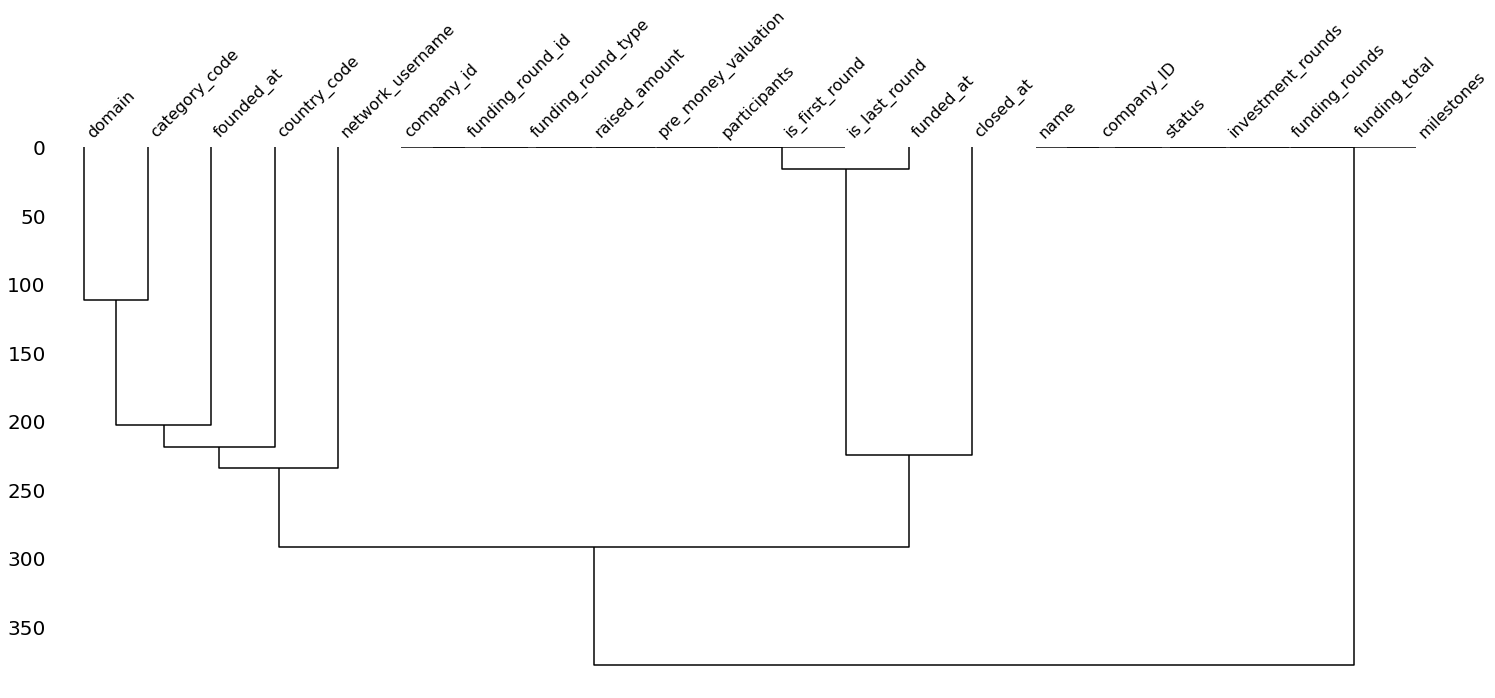

In [60]:
# Метод dendrogram из библиотеки missingno
!pip install missingno -q
import missingno as msno
msno.dendrogram(company_and_rounds_df)
plt.show()

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам


In [61]:
# Составим сводную таблицу по годам, в которой на основании столбца raised_amount для каждого года указан:
     # типичный размер средств, выделяемый в рамках одного раунда;
     # общее количество раундов финансирования за этот год.
raised_years = company_and_rounds_df.groupby(company_and_rounds_df['funded_at'].dt.to_period('Y')).agg({'raised_amount': ['median', 'count']})

# Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования
raised_years_top50 = raised_years[raised_years['raised_amount', 'count'] > 50]
raised_years_top50

raised_amount       
                 median  count
funded_at                     
1999          2000000.0     76
2000          4200000.0    125
2001          3000000.0     96
2002          4200000.0    116
2003          3000000.0    159
2004          5000000.0    291
2005          5500000.0   1633
2006          5000000.0   2436
2007          3973320.0   3279
2008          3110000.0   3774
2009          2000000.0   4151
2010          1602500.0   6221
2011          1200000.0   9204
2012          1000000.0   9970
2013          1200000.0  11072

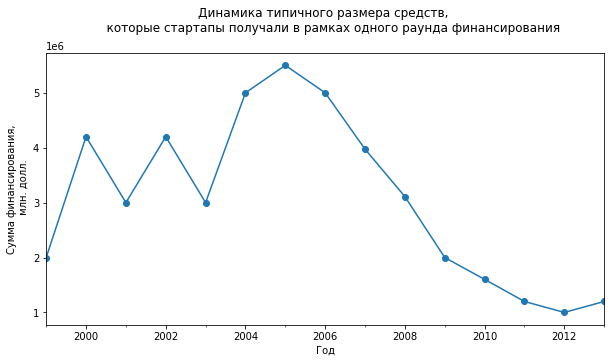

In [63]:
# На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

# Строим линейный график
raised_years_top50.plot(
    kind='line',
    y = ('raised_amount', 'median'),
    marker='o',
    title = f'''Динамика типичного размера средств, 
    которые стартапы получали в рамках одного раунда финансирования
    ''',
    legend = False,
    figsize=(10, 5)
)

# Подписываем и отображаем график
plt.xlabel('Год')
plt.ylabel(f'''Сумма финансирования,
 млн. долл.''')
plt.show()

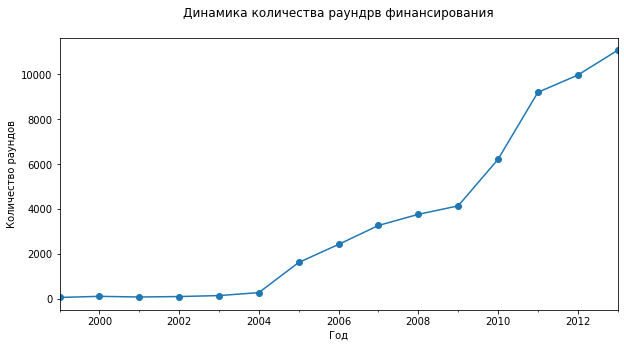

In [64]:
# На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

# Строим линейный график
raised_years_top50.plot(
    kind='line',
    y = ('raised_amount', 'count'),
    marker='o',
    title = f'''Динамика количества раундрв финансирования
    ''',
    legend = False,
    figsize=(10, 5)
)

# Подписываем и отображаем график
plt.xlabel('Год')
plt.ylabel(f'''Количество раундов''')
plt.show()

На основе полученных данных установлено, что в рамках одного раунда максимальных размер собранных средств составлял в 2005 году и составил 5,5 млн. долл.
В 2013 году количество раундов финансирования было максимальным, что составило 11,072 тыс., однако типичная величина раундов была на минимальном уровне (ниже только в 2012 году) и составила 1,2 млн. долл./раунд.

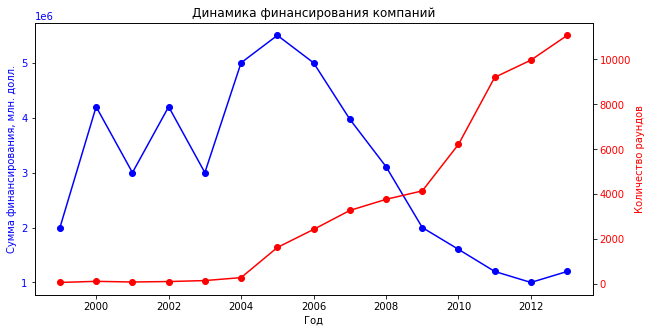

In [65]:
# визуализируем данные (1 способ)
if isinstance(raised_years_top50.index, pd.PeriodIndex):
    raised_years_top50.index = raised_years_top50.index.to_timestamp()

# Создание обзей фигуры
fig, ax1 = plt.subplots(figsize=(10, 5))

# Первая ось и график
ax1.plot(
    raised_years_top50.index,  
    raised_years_top50['raised_amount']['median'],
    marker='o',
    color='b',  
    label='Типичный размер средств (млн. долл.)'
)

# Настройка красивых осей 
ax1.set_xlabel('Год')
ax1.set_ylabel('Сумма финансирования, млн. долл.', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Вторые ось и график
ax2 = ax1.twinx() 
ax2.plot(
    raised_years_top50.index,
    raised_years_top50['raised_amount']['count'],
    marker='o',
    color='r',  
    label='Количество раундов'
)

# Настройка осей для второго графика
ax2.set_ylabel('Количество раундов', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Заголовок графика
plt.title('Динамика финансирования компаний');


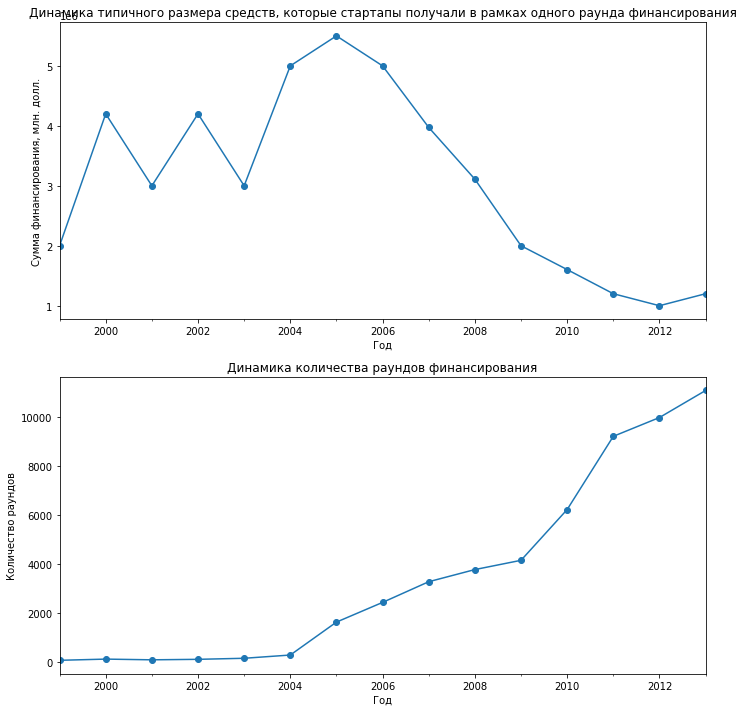

In [67]:
# визуализируем данные (2 способ)
if isinstance(raised_years_top50.index, pd.PeriodIndex):
    raised_years_top50.index = raised_years_top50.index.to_timestamp()

plt.figure(figsize=(10, 10))  

# Первый график
plt.subplot(2, 1, 1)
raised_years_top50.plot(
    kind='line',
    y=('raised_amount', 'median'),
    marker='o',
    title='Динамика типичного размера средств, которые стартапы получали в рамках одного раунда финансирования',
    legend=False,
    ax=plt.gca()  
)
plt.xlabel('Год')
plt.ylabel('Сумма финансирования, млн. долл.')

# Второй график
plt.subplot(2, 1, 2)
raised_years_top50.plot(
    kind='line',
    y=('raised_amount', 'count'),
    marker='o',
    title='Динамика количества раундов финансирования',
    legend=False,
    ax=plt.gca()  
)
plt.xlabel('Год')
plt.ylabel('Количество раундов')

plt.tight_layout()  
plt.show()



### 2.2. Люди и их образование


In [68]:
# Соединяем данные из двух датафреймов "левым" способом, чтобы сохранить все данные о сотрудниках без данных об образовании
company_education_df = people_df.merge(education_df, how='left', left_on = 'id', right_on = 'person_id')
company_education_df.head()

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT


In [69]:
# переименуем столбцы для удобства анализа
company_education_df = company_education_df.rename(columns={
    'id_x': 'person_id_all',
    'id_y': 'education_id'})

In [70]:
# сгруппируем данные по компаниям исходя из наличия записи об образовании 'education_id', поскольку данный столбец свидетельствует о наличии образования в целом, а в некоторых столбцах датафрейма "education_df" имеются пропуски
company_people = company_education_df.groupby('company_id').agg({'person_id_all': 'count', 'education_id': 'count'})

# найдем долю сотрудников с образованием
company_people['share_not_education'] = 1- company_people['education_id'] / company_people['person_id_all']
company_people

,person_id_all,education_id,share_not_education
company_id,,,
1.0,3,2,0.333333
2.0,1,1,0.000000
3.0,5,4,0.200000
4.0,18,17,0.055556
5.0,84,68,0.190476
...,...,...,...
285897.0,2,2,0.000000
285953.0,1,0,1.000000
285972.0,2,1,0.500000


Для определения границ групп компаний, проанализируем распределение данных.

In [71]:
# Изучаем статистические показатели количества сотрудников в компании
print('Статистические показатели количества сотрудников в компании:')
company_people.describe()

Статистические показатели количества сотрудников в компании:


,person_id_all,education_id,share_not_education
count,22922.000000,22922.000000,22922.000000
mean,1.953974,1.249367,0.458295
std,4.087373,3.405692,0.475686
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.250000
75%,2.000000,2.000000,1.000000
max,376.000000,300.000000,1.000000


In [72]:
# Проверяем распределение данных по значениям количества сотрудников
print('Распределение данных по значениям количества сотрудников:')
company_people['person_id_all'].value_counts(normalize=True)

Распределение данных по значениям количества сотрудников:


1      0.617311
2      0.206570
3      0.081014
4      0.036253
5      0.019501
6      0.011299
7      0.007024
8      0.005017
9      0.003752
11     0.002269
10     0.002225
13     0.001134
12     0.001091
18     0.000698
15     0.000611
14     0.000524
16     0.000524
19     0.000436
20     0.000393
17     0.000349
25     0.000175
27     0.000131
22     0.000131
44     0.000087
39     0.000087
24     0.000087
35     0.000087
30     0.000087
34     0.000087
26     0.000087
29     0.000087
28     0.000044
221    0.000044
59     0.000044
43     0.000044
46     0.000044
71     0.000044
42     0.000044
89     0.000044
73     0.000044
376    0.000044
64     0.000044
23     0.000044
70     0.000044
21     0.000044
84     0.000044
52     0.000044
66     0.000044
192    0.000044
80     0.000044
111    0.000044
Name: person_id_all, dtype: float64

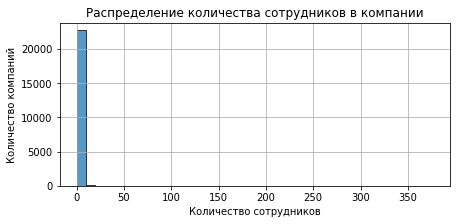

In [73]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
company_people['person_id_all'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=40, # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение количества сотрудников в компании')
plt.xlabel('Количество сотрудников')
plt.ylabel('Количество компаний')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

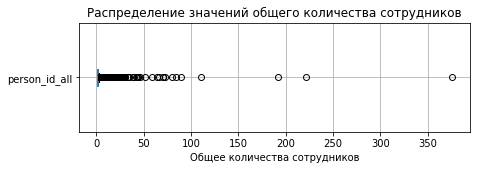

In [74]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
company_people.boxplot(column='person_id_all', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений общего количества сотрудников')
plt.xlabel('Общее количества сотрудников')

# Выводим график
plt.show()

Установлено, что около 60% компаний имеют только 1 сотрудника в штате, 20% - 2 сотрудника, по компаниям где 3-6  сотрудников - до 10% по каждой группе, по прочим компаниям доля менее 1%.
Равномерное распределение групп по количеству сотрудников невозможно, поскольку 60% компаний имеют только 1 сотрудника.

Рассмотрим распределения исключив группы до 2 человек (около 80% выборки) и группу свыше 100 человек (здесь наблюдаются единичные выбросы)

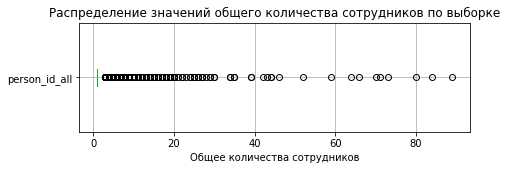

In [76]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
company_people.loc[(company_people['person_id_all'] != 2) & (company_people['person_id_all'] < 100)].boxplot(column='person_id_all', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений общего количества сотрудников по выборке')
plt.xlabel('Общее количества сотрудников')

# Выводим график
plt.show()

Согласно распределению значений по выборке, наблюдается высокая частота в группе до 25 человек, далее значения единичны.

В связи с этим, разделим компании по группам:

    * самозанятые (компания из 1 человека);
    
    * микрокомпании (компания из 2 человек);
    
    * малые компании (до 25 человек);
    
    * крупные компании (свыше 100 человек).

In [77]:
# Разделим все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп.
company_people['company_group'] = pd.cut(company_people['person_id_all'], bins=[0, 1, 2, 25, 100], labels=["Самозанятые", "Микрокомпании", "Малые компании", "Крупные компании"])
print('Распределение групп предприятий по средней доле сотрудников без образования')
company_people.groupby('company_group')['share_not_education'].agg(['mean', 'count'])

Распределение групп предприятий по средней доле сотрудников без образования


,mean,count
company_group,,
Самозанятые,0.592297,14150
Микрокомпании,0.226610,4735
Малые компании,0.260850,4002
Крупные компании,0.207094,31


Самую большую долю сотрудников без образования имеют самозанятые (1 человек в компании): фактически из них только 40% из них имеют образование. В целом по остальным группам доля распределена относительно равномерно. Тем не менне, в малых компаниях с сотрудниками до 25 человек, это доля без образования выше, чем по остальным (за исключением самозанятых) и составляет 26%.  

- Оценим, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`

Присоединение таблицы к объединенному датафрейму `company_people` возможно, он дополнит данные об образовании сотрудников из датафрейма `education_df`. Присоединение возможно по столбцу `object_id` — идентификатор сотрудника из таблицы `degrees.csv` (столбец `person_id` из левой таблицы `company_people`). Поскольку количество ненулевых строк в таблицах с данными об образовании `degrees.csv` и `people.csv` одинаковое, уже имеющиеся данные об образовании сотрудников будет дополнено.

In [79]:
# Данные в столбце 'object_id' имеют тип данных `object` и представлены в следующем виде: 
degrees_df['object_id']

0           p:6117
1           p:6136
2           p:6136
3           p:6005
4           p:5832
            ...   
109605    p:268589
109606    p:268527
109607    p:268527
109608    p:268528
109609    p:268528
Name: object_id, Length: 109610, dtype: object

In [80]:
# Для корректного соединения двух датафреймов необходимо привести к одному виду ключевые столбцы. Для этого в столбце 'object_id' датафрейма degrees_df оставим только числовые значения и переведем их в тип данных `int`
degrees_df['object_id'] = degrees_df['object_id'].str.slice(2)
degrees_df['object_id'] = pd.to_numeric(degrees_df['object_id'], downcast='integer')
education_df['person_id'] = pd.to_numeric(education_df['person_id'], downcast='integer')

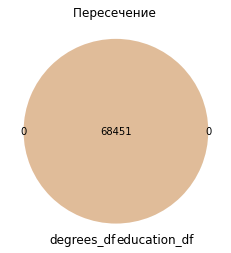

In [82]:
try:
    from matplotlib_venn import venn2
except ImportError:
    !pip install matplotlib-venn -q
    from matplotlib_venn import venn2
# Определим уникальные значения
first_id = set(degrees_df['object_id'].dropna().unique())
second_id = set(education_df['person_id'].dropna().unique())

# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('degrees_df', 'education_df'))
# Отображаем график
plt.title("Пересечение ")
plt.show()

На диаграмме Венна можно заметить, что id работников в двух датафреймах полностью совпадает.

In [84]:
# Отсортируем датафрейм по ключевому столбцу, сбросим индексы, для корректного присоединения данных
degrees_df = degrees_df.sort_values(by='object_id')
degrees_df = degrees_df.reset_index(drop=True)

In [85]:
# Отсортируем датафрейм по ключевому столбцу, сбросим индексы, для корректного присоединения данных
education_df = education_df.sort_values(by='person_id')
education_df = education_df.reset_index(drop=True)

In [86]:
# Соединим два датафрейма
education_all_df = pd.concat([education_df, degrees_df], axis=1)
education_all_df.head()

,id,person_id,instituition,graduated_at,id,object_id,degree_type,subject
0,699,2,"University of California, Berkeley",1994-01-01,699,2,BS,Electrical Engineering/Computer Science
1,700,2,"University of California, Berkeley",1994-01-01,700,2,BS,Applied Mathematics
2,707,3,Indiana University,NaT,706,3,BBA,NaN
3,706,3,Washington University in St Louis,NaT,707,3,MBA,NaN
4,47871,5,McGill University,1986-01-01,47871,5,BS,"Biology, Psychology"


In [87]:
# Проверим корректномть присоединения
education_all_df.loc[education_all_df['person_id'] != education_all_df['object_id']]

,id,person_id,instituition,graduated_at,id,object_id,degree_type,subject


In [88]:
# Выведем информацию о полученном датафрейме
education_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int32         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
 4   id            109610 non-null  int64         
 5   object_id     109610 non-null  int32         
 6   degree_type   98392 non-null   object        
 7   subject       81298 non-null   object        
dtypes: datetime64[ns](1), int32(2), int64(2), object(3)
memory usage: 5.9+ MB


In [89]:
# Удалим столбец object_id и id, поскольку данная информация задублирована.
education_all_df = education_all_df.drop(['id', 'object_id'] , axis=1)

# Выведем информацию о полученном датафрейме
education_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   person_id     109610 non-null  int32         
 1   instituition  109555 non-null  object        
 2   graduated_at  58054 non-null   datetime64[ns]
 3   degree_type   98392 non-null   object        
 4   subject       81298 non-null   object        
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 3.8+ MB


В результате присоединения двух датафреймов, был получен новый датафрейм с полной информацией об образовании сотрудников.
Количество ненулевых строк в полученном датафрейме соответствует количеству ненулевых строк в датафреймах `degrees_df` и `education_df`. Данные столбцов 'person_id' и 'object_id' идентичны. Были удалены продублированные столбцы.


### 2.3. Объединять или не объединять — вот в чём вопрос


In [90]:
common_usernames = set(people_df['network_username'].loc[pd.isna(people_df['network_username']) == False].str.lower().str.replace('_', '')) & set(company_and_rounds_df['network_username'].loc[pd.isna(company_and_rounds_df['network_username']) == False].str.lower().str.replace('_', '')) 
print(f'Совпадений в столбцах: {len(common_usernames)}')

Совпадений в столбцах: 2519


In [91]:
enumerator = 0
for i in people_df['network_username'].str.lower().str.replace('_', ''):
        if i in list(common_usernames):
            enumerator +=1
            
print(f'В датафрейме `people_df` {enumerator} совпадений из общего списка')            

В датафрейме `people_df` 2602 совпадений из общего списка


In [92]:
enumerator = 0
for i in company_and_rounds_df['network_username'].str.lower().str.replace('_', ''):
        if i in list(common_usernames):
            enumerator +=1
            
print(f'В датафрейме `company_and_rounds_df` {enumerator} совпадений из общего списка')

В датафрейме `company_and_rounds_df` 2883 совпадений из общего списка


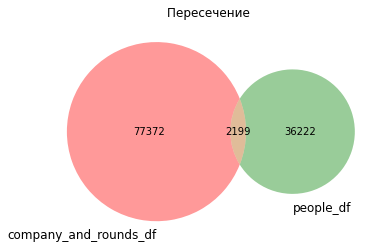

In [93]:
# Определим уникальные значения
first_id = set(company_and_rounds_df['network_username'].dropna().unique())
second_id = set(people_df['network_username'].dropna().unique())
# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('company_and_rounds_df', 'people_df'))

# Отображаем график
plt.title("Пересечение ")
plt.show()

Объединение двух датафреймов по столбцам `network_username` невозможно по нескольким причинам:
- в датафрейме `company_and_rounds_df` столбец отражает ник компании в сети, в датафрейме `people_df` столбец отражает ник сотрудника в социальных сетях.
- в столбцах имеется 2519 совпадений значений. В датафрейме `company_and_rounds_df` получено 2883 совпадения из общего списка, в датафрейме `people_df` 2603 совпадения. Это значит, что полученный датафрейм при объединении двух указанных, будет иметь как минимум  7,5 млн. строк.  При попытке соединить два датафрейма происходит ошибка ядра, что может свидетельствать перегрузке.
- также стоит отметить, что в данных датафреймах большое количество пропусков, особенно в `company_and_rounds_df`, что негативно скажется на объединении данных.


### 2.4. Проблемный датасет и причина возникновения пропусков



Проанализировав данные датафрейма, его пропуски, данные столбцов, можно сделать вывод, о том, что датасет `company_and_rounds.csv` фактически является результатом объединения двух датасетов: с данными о компаниями и с данными о раундов.
Разделим датафрейм `company_and_rounds_df` на:
- датафрейм `company_df` с данными о компаниях;
- датафрейм `rounds_df` с данными о раундах.

In [95]:
# создадим датафрейм `company_df` с данными о компаниях
company_df = company_and_rounds_df[['company_ID', 'name', 'category_code', 'status' ,'founded_at', 'closed_at', 'domain', 'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 'funding_total','milestones']]
company_df.reset_index()
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_ID         217472 non-null  float64       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [96]:
# Проверим есть ли строки с пропусками во всех столбцах
pd.isna(company_df)

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,True,True,False,True,False,False,False,False,False
4,False,False,False,False,True,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,True,True,True,True,True,True,True,True,True,True,True,True,True
217770,True,True,True,True,True,True,True,True,True,True,True,True,True
217771,True,True,True,True,True,True,True,True,True,True,True,True,True
217772,True,True,True,True,True,True,True,True,True,True,True,True,True


In [97]:
old_row_c = company_df.shape[0]
old_row_c

217774

Очевидно в полученном датафрейме присутствуют строки с пропусками во всех столбцах. Удалим их.

In [98]:
# Удалим строки с пропусками во всех столбцах
company_df = company_df.dropna(how='all')

In [99]:
new_row_c =company_df.shape[0]
print(f'В результате удаления строк с пропусками во всех столбцах было удалено {old_row_c - new_row_c} строк, осталось {new_row_c} строк')

В результате удаления строк с пропусками во всех столбцах было удалено 302 строк, осталось 217472 строк


In [100]:
# переименуем ключевой столбец для дальнейшей работы (переведем все к нижнему регистру)
company_df = company_df.rename(columns={
    'company_ID': 'company_id'})

In [101]:
# Добавляем данные о пропусках в относительных и абсолютных величинах
missing_company_df = (pd.DataFrame({'Кол-во пропусков': company_df.isnull().sum(), 'Доля пропусков': company_df.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing_company_df

,Кол-во пропусков,Доля пропусков
company_id,0,0.000000
name,0,0.000000
category_code,73586,0.338400
status,0,0.000000
founded_at,107516,0.494400
closed_at,214023,0.984100
domain,70313,0.323300
network_username,121938,0.560700
country_code,108865,0.500600
investment_rounds,0,0.000000


In [102]:
# Определим количество строк в датафрейме до удаления дубликатов
initial_row_count = company_df.shape[0]
print(f'Количество строк до удаления дубликатов: {initial_row_count}')

# Найдите дублирующиеся строки
df_sorted = company_df.sort_values(by=company_df.columns.tolist())
duplicates = company_df[company_df.duplicated()]
print("Дублирующиеся строки:")
print(duplicates)

# Удалите дублирующиеся строки
company_df = company_df.drop_duplicates()

# Определите количество строк в датафрейме после удаления дубликатов
final_row_count = company_df.shape[0]
print(f'Количество строк после удаления дубликатов: {final_row_count}')

Количество строк до удаления дубликатов: 217472
Дублирующиеся строки:
        company_id               name category_code     status founded_at  \
1              1.0           Wetpaint           web  operating 2005-10-17   
2              1.0           Wetpaint           web  operating 2005-10-17   
22         10015.0             Fitbit        health  operating 2007-10-01   
23         10015.0             Fitbit        health  operating 2007-10-01   
24         10015.0             Fitbit        health  operating 2007-10-01   
...            ...                ...           ...        ...        ...   
217464      3429.0  Zend Technologies      software  operating 1999-01-01   
217465      3429.0  Zend Technologies      software  operating 1999-01-01   
217466      3429.0  Zend Technologies      software  operating 1999-01-01   
217470     43233.0           Photonet   photo_video   acquired 2010-03-01   
217471     43233.0           Photonet   photo_video   acquired 2010-03-01   

     

In [103]:
# Проверяем неявные дубликаты в датафрейме company_df
company_df.duplicated(subset='company_id').sum()

0

In [104]:
# Переведем строковые данные в верхний регистр для удаления неявных дубликатов
columns = ['name', 'category_code', 'status', 'domain', 'network_username', 'country_code']
for i in columns:
    company_df[i] = company_df[i].str.upper()

In [105]:
# Определим количество строк в датафрейме до удаления дубликатов
initial_row_count = company_df.shape[0]
print(f'Количество строк до удаления дубликатов: {initial_row_count}')

# Найдите дублирующиеся строки
df_sorted = company_df.sort_values(by=company_df.columns.tolist())
duplicates = company_df[company_df.duplicated()]
print("Дублирующиеся строки:")
print(duplicates)

# Удалите дублирующиеся строки
company_df = company_df.drop_duplicates()

# Определите количество строк в датафрейме после удаления дубликатов
final_row_count = company_df.shape[0]
print(f'Количество строк после удаления дубликатов: {final_row_count}')

Количество строк до удаления дубликатов: 196553
Дублирующиеся строки:
Empty DataFrame
Columns: [company_id, name, category_code, status, founded_at, closed_at, domain, network_username, country_code, investment_rounds, funding_rounds, funding_total, milestones]
Index: []
Количество строк после удаления дубликатов: 196553


В ходе анализа явных и неявных дубликатов было удалено 20919 строк.

In [106]:
# создадим датафрейм `rounds_df` с данными о раундах
rounds_df = company_and_rounds_df[['funding_round_id', 'company_id', 'funded_at', 'funding_round_type' ,'raised_amount', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round']]
rounds_df.reset_index()
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id           52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 15.0+ MB


Аналогично удалим пропущенные строки и в датафрейме `rounds_df`.

In [107]:
# Проверим есть ли строки с пропусками во всех столбцах
pd.isna(rounds_df)

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
217769,False,False,False,False,False,False,False,False,False
217770,False,False,False,False,False,False,False,False,False
217771,False,False,False,False,False,False,False,False,False
217772,False,False,False,False,False,False,False,False,False


In [108]:
old_row_r = rounds_df.shape[0]
old_row_r

217774

Очевидно в полученном датафрейме присутствуют строки с пропусками во всех столбцах. Удалим их.

In [109]:
# выведем данные о первоначальном датафрейме `company_and_rounds_df`
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [110]:
# Удалим строки с пропусками во всех столбцах
rounds_df = rounds_df.dropna(how='all')

Полученный датафрейм практически не содержит пропусков (пропуски только в столбце funded_at, которые содержат менее 1% пропусков).

In [111]:
new_row_r =rounds_df.shape[0]
print(f'В результате удаления строк с пропусками во всех столбцах было удалено {old_row_r - new_row_r} строк, осталось {new_row_r} строк')

В результате удаления строк с пропусками во всех столбцах было удалено 164846 строк, осталось 52928 строк


In [112]:
# Добавляем данные о пропусках в относительных и абсолютных величинах
missing_rounds_df = (pd.DataFrame({'Кол-во пропусков': rounds_df.isnull().sum(), 'Доля пропусков': rounds_df.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing_rounds_df

,Кол-во пропусков,Доля пропусков
funding_round_id,0,0.000000
company_id,0,0.000000
funded_at,248,0.004700
funding_round_type,0,0.000000
raised_amount,0,0.000000
pre_money_valuation,0,0.000000
participants,0,0.000000
is_first_round,0,0.000000
is_last_round,0,0.000000


In [113]:
# Переведем строковые данные в верхний регистр для удаления неявных дубликатов
rounds_df['funding_round_type'] = rounds_df['funding_round_type'].str.upper()
    
# Определим количество строк в датафрейме до удаления дубликатов
initial_row_count = rounds_df.shape[0]
print(f'Количество строк до удаления дубликатов: {initial_row_count}')

# Найдите дублирующиеся строки
df_sorted = rounds_df.sort_values(by=rounds_df.columns.tolist())
duplicates = rounds_df[rounds_df.duplicated()]
print("Дублирующиеся строки:")
print(duplicates)

# Удалите дублирующиеся строки
rounds_df = rounds_df.drop_duplicates()

# Определите количество строк в датафрейме после удаления дубликатов
final_row_count = rounds_df.shape[0]
print(f'Количество строк после удаления дубликатов: {final_row_count}')

Количество строк до удаления дубликатов: 52928
Дублирующиеся строки:
Empty DataFrame
Columns: [funding_round_id, company_id, funded_at, funding_round_type, raised_amount, pre_money_valuation, participants, is_first_round, is_last_round]
Index: []
Количество строк после удаления дубликатов: 52928


Дубликаты полностью отсутствуют.

Полученный датафрейм практически не содержит пропусков (пропуски только в столбце funded_at, которые содержат менее 1% пропусков).

Анализируя полученные датафреймы, объем полученных данных по ним, можно заметить, что объем информации не поменялся, в каждой из таблиц имеется ключевой столбец `company_id` по которому можно получить данные о компании и раундах компании.
В результате раъединения датафреймов были удалены полностью пустые строки:
- по датафрейму `company_df` 302 строки. Такое количество пустых строк было по ключевому столбцу `company_ID` в первоначальном датафрейме `company_and_rounds_df`.
- по датафрейму `company_df` 164846 строки. Такое количество пустых строк было по ключевому столбцу `company_id` в первоначальном датафрейме `company_and_rounds_df`. Полученный датафрейм практически не содержит пропусков.


## Шаг 3. Исследовательский анализ объединённых таблиц



### 3.1. Объединение данных


In [114]:
# Осуществим срез по датафрейму `company_df`
comp_group = company_df.loc[(company_df['funding_rounds'] > 0) | (company_df['investment_rounds'] > 0) | (company_df['status'].str.lower() == 'acquired')]
comp_group

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,WETPAINT,WEB,OPERATING,2005-10-17,NaT,WETPAINT-INC.COM,BACHELRWETPAINT,USA,0.0,3.0,39750000.0,5.0
3,10.0,FLEKTOR,GAMES_VIDEO,ACQUIRED,NaT,NaT,FLEKTOR.COM,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,THERE,GAMES_VIDEO,ACQUIRED,NaT,NaT,THERE.COM,NaN,USA,0.0,0.0,0.0,4.0
15,1001.0,FRIENDFEED,WEB,ACQUIRED,2007-10-01,NaT,FRIENDFEED.COM,FRIENDFEED,USA,0.0,1.0,5000000.0,3.0
20,10014.0,MOBCLIX,MOBILE,ACQUIRED,2008-03-01,NaT,MOBCLIX.COM,MOBCLIX,USA,0.0,1.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217458,1344.0,VOBILE,WEB,OPERATING,2005-01-01,NaT,VOBILEINC.COM,NETWORKMOBILE,USA,0.0,1.0,10000000.0,0.0
217459,142181.0,STOP BEING WATCHED,SOFTWARE,OPERATING,2010-06-10,NaT,STOPBEINGWATCHED.COM,SBWINFONETWORK,USA,0.0,1.0,500000.0,1.0
217463,3429.0,ZEND TECHNOLOGIES,SOFTWARE,OPERATING,1999-01-01,NaT,ZEND.COM,NETWORKZEND,USA,0.0,4.0,44000000.0,6.0
217467,7748.0,FLOWGRAM,WEB,CLOSED,2007-06-01,2008-06-11,FLOWGRAM.COM,NETWORK,USA,0.0,1.0,1300000.0,3.0


In [115]:
comp_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  float64       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 4.

In [116]:
# Добавляем данные о пропусках в относительных и абсолютных величинах
missing_acquisition_df = (pd.DataFrame({'Кол-во пропусков': comp_group.isnull().sum(), 'Доля пропусков': comp_group.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing_acquisition_df

,Кол-во пропусков,Доля пропусков
company_id,0,0.000000
name,0,0.000000
category_code,5432,0.133300
status,0,0.000000
founded_at,12940,0.317600
closed_at,38619,0.947800
domain,4993,0.122500
network_username,19897,0.488300
country_code,6005,0.147400
investment_rounds,0,0.000000


In [117]:
comp_group = comp_group.reset_index(drop=True) #сбросим индексы для корректной работы

# Изменяем тип данных на `int` (в том числе понижаем разрядность). Прописываем цикл для всех столбцов.
columns = ['company_id', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']
for column in columns:
    comp_group[column] = pd.to_numeric(comp_group[column], errors='coerce', downcast='integer')
    type_col = comp_group[column].dtypes
    print(f'{column} изменен тип на {type_col}')

company_id изменен тип на int32
investment_rounds изменен тип на int16
funding_rounds изменен тип на int8
funding_total изменен тип на int64
milestones изменен тип на int8


Полученный срез по датафрейму `company_df` составляет 40 747 строк.

Пропуски имеются в столбцах: `category_code` (13%), `founded_at` (32%), `closed_at` (95%), `domain` (12%), `network_username` (49%), `country_code` (15%). Информация в столбцах `domain`, `network_username`, `country_code` неосновная, пропуски не повлияют на работу. Пропуски в столбце `closed_at`, скорее всего означают, что компания действующая.

Дубликаты были удалены на этапе предобработки датафрейма `company_df`.

Для большей производительности, обработаны типы данных по столбцам 'company_id', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones' с числовыми данными, изменены на `int` с пониженной разрядностью.

**Вывод**: В результате обработки имеющихся данных получена выборка по 40 747 компаниям, которые имеют статус: приобретенные, или в отношении которых было осуществлено финансирование. Полученный срез предобработан: проанализированы пропуски, изменены типы данных на корректные, дубликаты были удалены на этапе предобработки основного датафрейма.


### 3.2. Анализ выбросов


In [118]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# Изучаем статистические показатели столбца funding_total
print('Статистические показатели столбца funding_total:')
comp_group['funding_total'].describe()

Статистические показатели столбца funding_total:


count        40747.00
mean      10135609.64
std       56464359.98
min              0.00
25%              0.00
50%         600000.00
75%        5650650.00
max     5700000000.00
Name: funding_total, dtype: float64

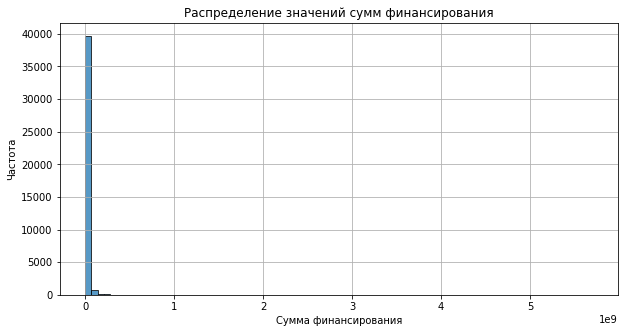

In [119]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим гистограмму с помощью pandas через plot(kind='hist')
comp_group['funding_total'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=80, # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений сумм финансирования')
plt.xlabel('Сумма финансирования')
plt.ylabel('Частота')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

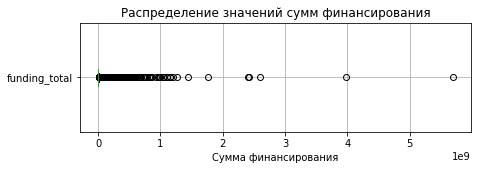

In [120]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце balance
comp_group.boxplot(column='funding_total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений сумм финансирования')
plt.xlabel('Сумма финансирования')

# Выводим график
plt.show()

Согласно полученным данным о распределении данных, возможно заметить, что размах сумм финансирования высокий. Среднее значение суммы существенно выше медианного значения, стандартное отклонение также высокое, что также подтверждает высокий разброс.
На графиках распределения возможно заметить, что в основном суммы находятся в пределах 1,2 млн. долл., значения свыше единичны.

In [121]:
# Вычисляем квартили Q1 и Q3
Q1 = comp_group['funding_total'].quantile(0.25)
Q3 = comp_group['funding_total'].quantile(0.75)

# Вычисляем межквартильный размах IQR
IQR = Q3 - Q1

# Определяем верхний порог для выбросов
upper_bound = Q3 + 1.5 * IQR

print(f'Верхний порог выбросов: {upper_bound}')

Верхний порог выбросов: 14126625.0


In [122]:
# Вычисляем квартили Q1 и Q3
Q1 = comp_group['funding_total'].quantile(0.25)
Q3 = comp_group['funding_total'].quantile(0.75)

# Вычисляем межквартильный размах IQR
IQR = Q3 - Q1

# Определяем нижний порог для выбросов. Учитывая распределение, скошенное в левую сторону, уменьшим коэффициент до 1
lower_bound = Q3 - 1 * IQR

print(f'Нижний порог выбросов: {lower_bound}')

Нижний порог выбросов: 0.0


**Вывод**: Распределение данных неравномерное, размах и разброс данных высокий, имеются единичные выбросы в "правом" хвосте на графике распределения. Учитывая данные о межквартильном размахе, значения 'funding_total' сумм финансирования свыше 14 126 625 долл. можно считать выбросами. Нижний порог для выбросов отсутствует, поскольку распределение ассиметричное, основные значения показателя сосредоточены в левой части.


### 3.3. Куплены забесплатно?



In [123]:
# Соединяем данные из двух датафреймов "левым" способом
acq_comp_df = comp_group.merge(acquisition_df, how='left', left_on = 'company_id', right_on = 'acquired_company_id')
acq_comp_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,WETPAINT,WEB,OPERATING,2005-10-17,NaT,WETPAINT-INC.COM,BACHELRWETPAINT,USA,0,3,39750000,5,NaN,NaN,NaN,NaN,NaN,NaT
1,10,FLEKTOR,GAMES_VIDEO,ACQUIRED,NaT,NaT,FLEKTOR.COM,NaN,USA,0,0,0,0,1.00,11.00,10.00,NaN,20000000.00,2007-05-30
2,100,THERE,GAMES_VIDEO,ACQUIRED,NaT,NaT,THERE.COM,NaN,USA,0,0,0,4,20.00,377.00,100.00,cash,0.00,2005-05-29
3,1001,FRIENDFEED,WEB,ACQUIRED,2007-10-01,NaT,FRIENDFEED.COM,FRIENDFEED,USA,0,1,5000000,3,1901.00,5.00,1001.00,cash_and_stock,47500000.00,2009-08-10
4,10014,MOBCLIX,MOBILE,ACQUIRED,2008-03-01,NaT,MOBCLIX.COM,MOBCLIX,USA,0,1,0,4,3878.00,23054.00,10014.00,NaN,0.00,2010-09-30


In [124]:
# Осуществим срез по компаниям, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования
free_comp = acq_comp_df.loc[(acq_comp_df['price_amount'] <= 1)  & (acq_comp_df['funding_total'] != 0)]
free_comp

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
25,10054,JUMPTAP,MOBILE,ACQUIRED,2005-01-01,NaT,JUMPTAP.COM,JUMPTAP,USA,0,7,121500000,3,9288.00,23283.00,10054.00,cash_and_stock,0.00,2013-08-13
63,101312,SIDETOUR,WEB,ACQUIRED,2011-06-01,NaT,SIDETOUR.COM,SIDETOUR,USA,0,3,4000000,2,9653.00,11391.00,101312.00,NaN,0.00,2013-09-18
66,101340,CHOICEPASS,ENTERPRISE,ACQUIRED,2011-07-01,NaT,CHOICEPASS.COM,CHOICEPASS,USA,0,1,250000,1,7272.00,1972.00,101340.00,NaN,0.00,2012-06-18
67,10137,PRODUCTEEV,SOFTWARE,ACQUIRED,2008-07-08,NaT,PRODUCTEEV.COM,PRODUCTEEV,USA,0,3,1310000,2,8254.00,757.00,10137.00,cash_and_stock,0.00,2012-11-05
68,10139,TRADECARD,ENTERPRISE,ACQUIRED,1999-01-01,NaT,TRADECARD.COM,TRADECARD,USA,0,2,44925000,1,9326.00,44008.00,10139.00,NaN,0.00,2013-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,99,AMIE STREET,WEB,ACQUIRED,2011-07-04,NaT,AMIESTREET.COM,AMIESTREET_LOGS,USA,0,2,3900000,0,7024.00,317.00,99.00,NaN,0.00,2010-09-22
40836,9905,UBMATRIX,SOFTWARE,ACQUIRED,2005-01-01,NaT,UBMATRIX.COM,NaN,USA,0,2,5172350,0,3381.00,41119.00,9905.00,NaN,0.00,2010-06-24
40840,992,WUNDERLOOP,ADVERTISING,ACQUIRED,1999-01-01,NaT,WUNDERLOOP.COM,NaN,USA,0,1,10000000,1,9916.00,19182.00,992.00,NaN,0.00,2010-07-02
40854,997,ZIMBRA,ENTERPRISE,ACQUIRED,2003-01-01,NaT,ZIMBRA.COM,ZIMBRA,USA,0,1,14500000,3,9121.00,415.00,997.00,NaN,0.00,2013-07-15


In [125]:
# Изучаем статистические показатели столбца funding_total
print('Статистические показатели столбца funding_total:')
free_comp['funding_total'].describe()

Статистические показатели столбца funding_total:


count         1618.00
mean      18152961.94
std      144503027.47
min           3750.00
25%        2000000.00
50%        6000000.00
75%       15500000.00
max     5700000000.00
Name: funding_total, dtype: float64

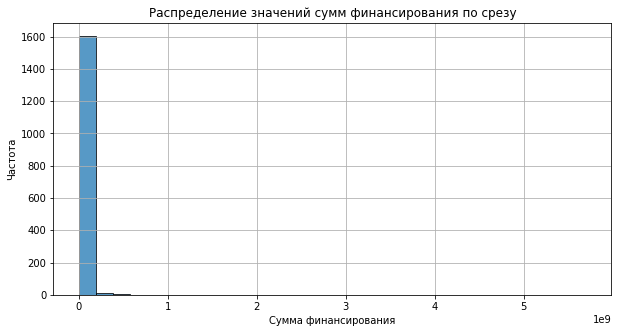

In [126]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим гистограмму с помощью pandas через plot(kind='hist')
free_comp['funding_total'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=30, # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений сумм финансирования по срезу')
plt.xlabel('Сумма финансирования')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

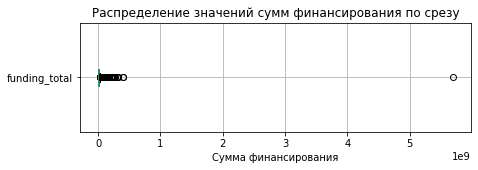

In [127]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце balance
free_comp.boxplot(column='funding_total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений сумм финансирования по срезу')
plt.xlabel('Сумма финансирования')

# Выводим график
plt.show()

In [128]:
# Вычисляем квартили Q1 и Q3
Q1 = free_comp['funding_total'].quantile(0.25)
Q3 = free_comp['funding_total'].quantile(0.75)

# Вычисляем межквартильный размах IQR
IQR = Q3 - Q1

# Определяем верхний порог для выбросов
upper_bound = Q3 + 1.5 * IQR

print(f'Верхний порог выбросов: {upper_bound}')

Верхний порог выбросов: 35750000.0


In [129]:
# Вычисляем квартили Q1 и Q3
Q1 = free_comp['funding_total'].quantile(0.25)
Q3 = free_comp['funding_total'].quantile(0.75)

# Вычисляем межквартильный размах IQR
IQR = Q3 - Q1

# Определяем нижний порог для выбросов. Учитывая распределение, скошенное в левую сторону, уменьшим коэффициент до 1
lower_bound = Q3 - 1 * IQR

print(f'Нижний порог выбросов: {lower_bound}')

Нижний порог выбросов: 2000000.0


In [130]:
# находим общее количество фактов финансирования
total_count = free_comp['funding_total'].count()

# находим количество финансирований меньше нижней границы ('левый ус') и больше правой границы  ('правый ус') 
lower_bound_count = free_comp['funding_total'].loc[free_comp['funding_total'] < lower_bound].count()
upper_bound_count = free_comp['funding_total'].loc[free_comp['funding_total'] > upper_bound].count()

# находим долю выбросов по нижней и верхней границе
lower_bound_share = lower_bound_count / total_count
upper_bound_share = upper_bound_count / total_count

print(f'''Верхний порог для выбросов составляет {upper_bound} долл., в количестве {lower_bound_count} ед. Доля выбросов составляет {lower_bound_share} ед.

Нижний порог выбросов для выбросов составляет {lower_bound} долл., в количестве {upper_bound_count} ед. Доля выбросов составляет {upper_bound_share} ед.
''')

Верхний порог для выбросов составляет 35750000.0 долл., в количестве 388 ед. Доля выбросов составляет 0.23980222496909764 ед.

Нижний порог выбросов для выбросов составляет 2000000.0 долл., в количестве 147 ед. Доля выбросов составляет 0.09085290482076638 ед.



Обратимся к данным, чтобы проанализировать, почему сделки совершались по околонулевым ценам.
Проверим гипотезу о том, что покупка компаний, осуществлялась недействующих компаний (есть данные по дате закрытия компании 'closed_at').

In [131]:
# Рассчитаем долю "закрытых" компаний среди проданных за 0-1 долл.
print(f'''Доля закрытых компаний по выборке {round(free_comp['closed_at'].count() / len(free_comp), 4)}''')

Доля закрытых компаний по выборке 0.008


Гипотеза не была проверена. Менее 1% компаний были закрытыми.

Проверим, возможно, покупка была совершена самим фондом инвестирования.

In [132]:
# Рассчитаем долю компаний, купленных фондами, которыми они финансировались.
# для этого к имеющемся срезу, присоединим данные о раундах и их сведениях.
comp_round_df = free_comp.merge(rounds_df, how='left', left_on = 'company_id', right_on = 'company_id')
comp_round_all_df = comp_round_df.merge(investment_df, how='left', left_on = 'funding_round_id', right_on = 'funding_round_id')

print(f'''Количество компаний, купленных самими фондами: {len(comp_round_all_df.loc[comp_round_all_df['fund_id'] == comp_round_all_df['acquiring_company_id']])}''')

Количество компаний, купленных самими фондами: 2


**Вывод**: В результате анализа установлено, что 1167 компаний было продано за цену менее 1 доллара (при ненулевом общем объёме финансирования). Вместе с этим, суммы финансирования имеют высокий размах по данному срезу. Среднее значение выше медианного, а также высокое стандартное отклонение подтверждает данный факт. Имеются также единичные выбросы и в нижней границе.

Верхний порог выбросов по данному срезу составляет 35,750 млн. долл, что составляет 388 сделок, доля таких сделок составляет 24%, что является достаточно большим показателем. Нижний порог выбросов составляет 2 млн. долл., в количестве 147 сделок, что составляет 9% от общего числа сделок по срезу компаний, проданных за 0-1 долл.

Также была проанализирована возможная причина покупке по такой аномальной стоимости. В результате анализа получено, что 99% купленных компаний действующие, т.е. факт закрытия не является причиной по всему срезу. Также не является причиной покупка компаний фондами, которые осуществляли финансирование. Можно только предположить, что цена покупок соответствовала финансовому состоянию покупаемых компаний.


### 3.4. Цены стартапов по категориям


In [133]:
# Изучаем статистические показатели столбца 'price_amount'
print('Статистические показатели столбца price_amount по категориям стартапов:')
acq_comp_df.groupby('category_code')['price_amount'].describe()

Статистические показатели столбца price_amount по категориям стартапов:


,count,mean,std,min,25%,50%,75%,max
category_code,,,,,,,,
ADVERTISING,314.00,69465891.72,279922643.51,0.00,0.00,0.00,3000000.00,3100000000.00
ANALYTICS,40.00,13575000.00,52671642.49,0.00,0.00,0.00,0.00,263000000.00
AUTOMOTIVE,5.00,1528600000.00,2297757559.01,0.00,0.00,43000000.00,2400000000.00,5200000000.00
BIOTECH,454.00,426312140.97,1540373521.41,0.00,0.00,13200000.00,250000000.00,20000000000.00
CLEANTECH,116.00,162158017.24,552287325.04,0.00,0.00,0.00,69000000.00,3750000000.00
CONSULTING,135.00,69611037.04,505481358.76,0.00,0.00,0.00,0.00,5750000000.00
DESIGN,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ECOMMERCE,275.00,43912036.40,151236352.36,0.00,0.00,0.00,0.00,1250000000.00
EDUCATION,33.00,24239090.91,125364201.89,0.00,0.00,0.00,0.00,721000000.00


In [151]:
# Определим цену покупки и разброс цен по категориям
category_group_df = pd.DataFrame({'Типичная цена покупки': acq_comp_df.groupby('category_code')['price_amount'].median(), 'Разрос цен': (acq_comp_df.groupby('category_code')['price_amount'].quantile(0.75) - acq_comp_df.groupby('category_code')['price_amount'].quantile(0.25))})
category_group_df

,Типичная цена покупки,Разрос цен
category_code,,
ADVERTISING,0.00,3000000.00
ANALYTICS,0.00,0.00
AUTOMOTIVE,43000000.00,2400000000.00
BIOTECH,13200000.00,250000000.00
CLEANTECH,0.00,69000000.00
CONSULTING,0.00,0.00
DESIGN,0.00,0.00
ECOMMERCE,0.00,0.00
EDUCATION,0.00,0.00


In [152]:
# Определим топ 7 категорий по цене покупки
top_price = category_group_df.sort_values(by='Типичная цена покупки', ascending=False).head(7).drop('Разрос цен' , axis=1)
top_price

,Типичная цена покупки
category_code,
NANOTECH,584000000.00
MANUFACTURING,72000000.00
REAL_ESTATE,50000000.00
AUTOMOTIVE,43000000.00
BIOTECH,13200000.00
HOSPITALITY,12500000.00
FINANCE,600000.00


In [153]:
# Определим топ 7 категорий по разбросу
top_variation = category_group_df.sort_values(by='Разрос цен', ascending=False).head(7).drop('Типичная цена покупки' , axis=1)
top_variation

,Разрос цен
category_code,
AUTOMOTIVE,2400000000.00
REAL_ESTATE,903500000.00
MANUFACTURING,615000000.00
SPORTS,260000000.00
BIOTECH,250000000.00
FINANCE,170750000.00
TRANSPORTATION,125000000.00


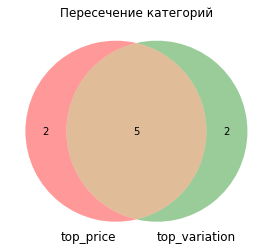

In [140]:
top_price = top_price.reset_index().rename(columns={'index':'category_code'})
top_variation = top_variation.reset_index().rename(columns={'index':'category_code'})
# Определим уникальные значения
first_id = set(top_price['category_code'].dropna().unique())
second_id = set(top_variation['category_code'].dropna().unique())

# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('top_price', 'top_variation'))

# Отображаем график
plt.title("Пересечение категорий")
plt.show()

**Вывод**:

При ранжировании категорий стартапов были исследованы типичные (медианные) значения цен и их разброс (межквартильный размах) по категории.

Учитывая цель исследования: определение типичных значений, а также наличие выбросов, в качестве типичных значений были выбраны медианные значения.
Поскольку в условиях наличия выбросов, а также существленного отличия медианы от среднего значения, лучшим выбором для разброса цен будет являться межквартильный размах.

Рассматривая полученные данные, возможно заметить:
 - согласно диаграмме Венна выявлено 5 пересечений по категориям в топе 7 самых финансируемых категорий стартапов и топе 7 самых высоких по разбросу сумм финансирования:

    * AUTOMOTIVE
    * MANUFACTURING
    * REAL_ESTATE
    * BIOTECH
    * FINANCE
    
 - самой высокой типичной ценой покупки обладает категория стартапов `NANOTECH` (около 584 млн. долл.), однако данная категория не входит в топ 7 по разбросу, т.е. цены в этой категории относительно стабильны.
 - категории стартаров `MANUFACTURING` `REAL_ESTATE` занимают 2 и 3 места в топах по ценам и их разбросам, т.е. обладают и высокой ценой и высоким разбросом.


### 3.5. Сколько раундов продержится стартап перед покупкой


In [141]:
# Изучаем статистические показатели столбца funding_rounds
print('Статистические показатели столбца funding_rounds:')
comp_group['funding_rounds'].describe()

Статистические показатели столбца funding_rounds:


count   40747.00
mean        1.29
std         1.26
min         0.00
25%         1.00
50%         1.00
75%         2.00
max        15.00
Name: funding_rounds, dtype: float64

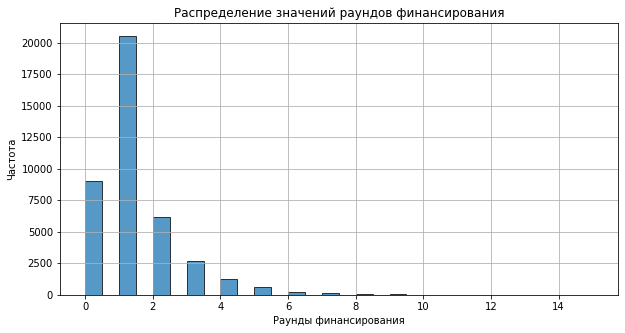

In [142]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим гистограмму с помощью pandas через plot(kind='hist')
comp_group['funding_rounds'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=30, # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений раундов финансирования')
plt.xlabel('Раунды финансирования')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

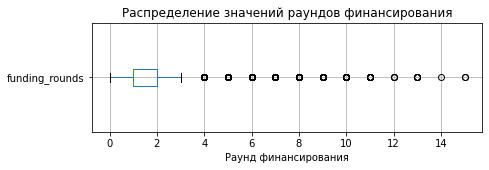

In [143]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце balance
comp_group.boxplot(column='funding_rounds', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений раундов финансирования')
plt.xlabel('Раунд финансирования')

# Выводим график
plt.show()

In [149]:
status_group = comp_group.groupby('status')['funding_rounds'].mean().sort_values()
status_group

status
ACQUIRED    0.52
CLOSED      1.38
OPERATING   1.52
IPO         1.93
Name: funding_rounds, dtype: float64

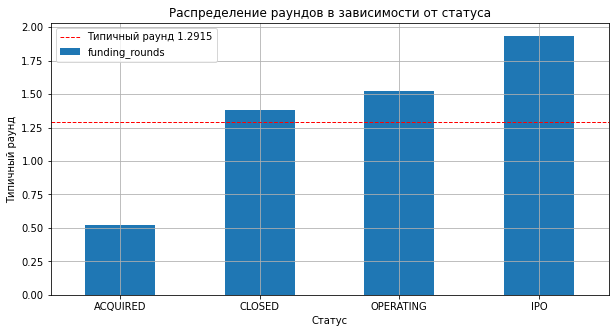

In [145]:
# Строим график столбчатой диаграммы

status_group.plot(kind='bar',
               title=f'Распределение раундов в зависимости от статуса',
               legend=True,
               ylabel='Типичный раунд',
               xlabel='Статус',
               rot=0,
               figsize=(10, 5))

# Рассчитываем среднее значение по раундам
mean_rounds_share = comp_group['funding_rounds'].mean()

# Наносим на график линию с средним значением раундов
plt.axhline(mean_rounds_share, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Типичный раунд {round(mean_rounds_share,4)}')

plt.grid()
plt.legend()

# Выводим график
plt.show()

Рассмотрим распределение раундов в зависимости от статуса по компаниям, которые получали финансирование.

In [147]:
status_group_with_fund = comp_group.loc[comp_group['funding_total']>0].groupby('status')['funding_rounds'].mean().sort_values()
status_group_with_fund

status
CLOSED      1.45
OPERATING   1.72
ACQUIRED    1.98
IPO         2.55
Name: funding_rounds, dtype: float64

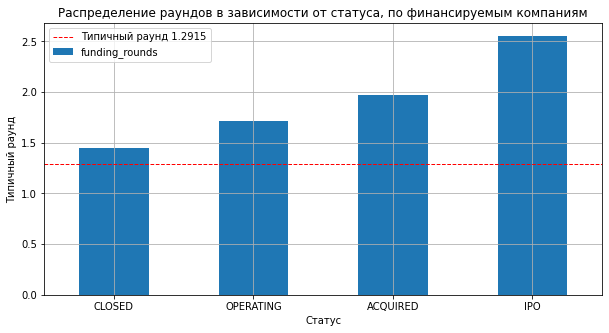

In [150]:
# Строим график столбчатой диаграммы

status_group_with_fund.plot(kind='bar',
               title=f'Распределение раундов в зависимости от статуса, по финансируемым компаниям',
               legend=True,
               ylabel='Типичный раунд',
               xlabel='Статус',
               rot=0,
               figsize=(10, 5))

# Рассчитываем среднее значение по раундам
mean_rounds_share = comp_group['funding_rounds'].mean()

# Наносим на график линию с средним значением раундов
plt.axhline(mean_rounds_share, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Типичный раунд {round(mean_rounds_share,4)}')

plt.grid()
plt.legend()

# Выводим график
plt.show()

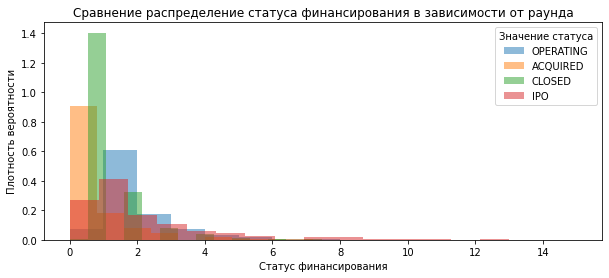

In [146]:
# Строим гистограмму распределения значений возраста
# Создаём фигуру графика
plt.figure(figsize=(10, 4))

# Строим гистограммы для каждого значения churn
for i in comp_group['status'].unique():
    # Фильтруем данные по значению столбца churn
    comp_group.loc[comp_group['status'] == i, 'funding_rounds'].plot(
        kind='hist',
        density=True,
        bins=15,
        alpha=0.5,
        label=f'{i}',
        legend=True
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение распределение статуса финансирования в зависимости от раунда')
plt.xlabel('Статус финансирования')
plt.ylabel('Плотность вероятности')
plt.legend(title='Значение статуса')
plt.show()

**Вывод**:

Согласно распределению раундов финансирования установлено, что типичное значение раундов в целом составляет 1, среднее значение составляет 1,29. График распределения показывает "левый хвост", что отражает высокий разброс в верхней границе. По боксплот возможно заметить, что выбросы единичные в левом хвосте. Выбросов в нижней границе не установлено.

Согласно столбчатой диаграмме установлено, что наименьшее количество раундов финансирования характерно для приобретенных компаний, в среднем 0,52. Самое высокое количество раундов соответствует компаниям вышедшим на IPO (почти 2 раунда). Для закрытых и действующих компаний, количество раундов в среднем находится около 1,5.

По компаниям, получившим финансирование, распределение количества раундов иначе. Меньшее количество раундов характерно для закрытых компаний (1,45), для действущих и приобретенных чуть ниже 2. Для компаний, вышедших на IPO, среднее количество раундов выше всех по группе и составляет около 2.5. Также стоит отметить, что по таким компаниям в целом среднее количество раундов выше.


## Шаг 4. Итоговый вывод и рекомендации


**В рамках данного проекта ознакомились с данными датасетов, содержащие информацию**:

- Таблица `acquisition`. Содержит информацию о покупках одними компаниями других компаний;
- Таблица `company_and_rounds`. Содержит информацию о компаниях и раундах финансирования;
- Таблица `education`. Содержит информацию об образовании сотрудника;
- Таблица `people`. Содержит информацию о сотрудниках;
- Таблица `degrees`. Содержит информацию о типе образования сотрудника;
- Таблица `fund`. Содержит информацию о фондах;
- Таблица `investment`. Содержит информацию о раундах инвестирования.

**Предобработка и предварительное исследование**

На этапе предобработки была выполнена замена типов данных в столбцах, отражающих дату и время. 
Были проанализированы пропуски во всех столбцах датафреймов.

Была проанализирована динамика сумм финансирования за 1 раунд. На основе полученных данных установлено, что в рамках одного раунда максимальных размер собранных средств составлял в 2005 году и составил 5,5 млн. долл. В 2013 году количество раундов финансирования было максимальным, что составило 11,072 тыс., однако типичная величина раундов была на минимальном уровне (ниже только в 2012 году) и составила 1,2 млн. долл./раунд.

Также был проанализирован факт наличия образования сотрудников по группам компаний. Самую большую долю сотрудников без образования имеют самозанятые (1 человек в компании): фактически из них только 40% из них имеют образование. В целом по остальным группам доля распределена относительно равномерно. Тем не менне, в малых компаниях с сотрудниками до 25 человек, это доля без образования выше, чем по остальным (за исключением самозанятых) и составляет 26%.

**Исследовательский анализ**

Далее детально проработан датасет `company_and_rounds`:
- был разделен на две таблицы: данные о компаниях и данные о раундах;
- был детально предобработан датасет о компаниях, по которому в дальнейшем был проведен исследовательский анализ: были изменены типы данных, удалены дубликаты.

На основании данных датасета `company_and_rounds` был получен срез. В результате обработки имеющихся данных получена выборка по 40 747 компаниям, которые имеют статус: приобретенные, или в отношении которых было осуществлено финансирование. Полученный срез предобработан: проанализированы пропуски, изменены типы данных на корректные, дубликаты были удалены на этапе предобработки основного датафрейма.

На основании полученного среза данных, был проведен исследовательский анализ, в результате которого получено:

- Распределение данных `funding_total` сумм финансирования неравномерное, размах и разброс данных высокий, имеются единичные выбросы в "правом" хвосте. Значения `funding_total` сумм финансирования свыше 14 126 625 долл. можно считать выбросами. Нижний порог для выбросов отсутствует, поскольку распределение ассиметричное, основные значения показателя сосредоточены в левой части.

- В результате анализа установлено, что 1618 компаний было продано за цену менее 1 доллара (при ненулевом общем объёме финансирования). Вместе с этим, суммы финансирования имеют высокий размах по данному срезу. Верхний порог выбросов по данному срезу составляет 35,750 млн. долл, что составляет 388 сделок, доля таких сделок составляет 24%, что является достаточно большим показателем. Нижний порог выбросов составляет 2 млн. долл., в количестве 147 сделок, что составляет 9% от общего числа сделок по срезу компаний, проданных за 0-1 долл.
    Также была проанализирована возможная причина покупке по такой аномальной стоимости. В результате анализа получено, что 99% купленных компаний действующие, т.е. факт закрытия не является причиной по всему срезу. Также не является причиной покупка компаний фондами, которые осуществляли финансирование. Можно только предположить, что цена покупок соответствовала финансовому состоянию покупаемых компаний.

- При ранжировании категорий стартапов были исследованы медианные значения цен покупок и их разброс (межквартильный размах) по категории. РРссматривая полученные данные, возможно заметить, что выявлено 5 пересечений по категориям в топе 7 самых финансируемых категорий стартапов и топе 7 самых высоких по разбросу сумм финансирования:

    * AUTOMOTIVE
    * MANUFACTURING
    * REAL_ESTATE
    * BIOTECH
    * FINANCE
    
     Самой высокой типичной ценой покупки обладает категория стартапов `NANOTECH` (около 584 млн. долл.), однако данная категория не входит в топ 7 по разбросу, т.е. цены в этой категории относительно стабильны. Категории стартаров `MANUFACTURING` `REAL_ESTATE` занимают 2 и 3 места в топах по ценам и их разбросам, т.е. обладают и высокой ценой и высоким разбросом.

 
- Согласно распределению раундов финансирования установлено, что типичное значение раундов в целом составляет 1, среднее значение составляет 1,29. Имеется высокий разброс в верхней границе. Выбросов в нижней границе не установлено.
    Наименьшее количество раундов финансирования характерно для приобретенных компаний, в среднем 0,52. Самое высокое количество раундов соответствует компаниям вышедшим на IPO (почти 2 раунда). Для закрытых и действующих компаний, количество раундов в среднем находится около 1,5.
    По компаниям, получившим финансирование, в целом среднее количество раундов выше.

**Основные выводы и рекомендации:**

В целом суммы финансирования сосредоточены до 14 млн. долл., вместе с этим для компаний с околонулевыми сделками до 35,75 млн. долл. Нижний порог сумм финансирования с околонулевыми сделками составляет около 2 млн. долл. 
Таким образом, околонулевые сделки имеют более высокий разброс сумм финансирования.

Для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов, могут быть привлекательными категориям стартапов `AUTOMOTIVE`, `MANUFACTURING`, `REAL_ESTATE`, `BIOTECH`, `FINANCE`. Они имеют с типично высокими ценами покупки стартапов и значительным разбросом цен. Особое место среди данных категорий занимает `AUTOMOTIVE`, оно находится в топе по самым высоким ценам.

Типичное количество раундов в целом составляет 1, тогда как для приобретенных компаний этот показатель ниже и составляет 0,52, а для компаний, вышедших на IPO почти 2 раунда.
